# 전처리 및 라벨 추출

필요 없는 단어를 제거하고, 문장을 작은 여러 개의 문장으로 나눠,
SentencePiece를 기준으로 랭킹이 높은 토큰 5개를 필터링한다. 이때, 1글자짜리 토큰은 휠을 제거하


## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/정비메모분석/data'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
pip install sentencepiece

     |████████████████████████████████| 1.2 MB 10.0 MB/s 


In [ ]:
import sentencepiece as spm

In [ ]:
%load_ext google.colab.data_table

# Description 전처리

In [ ]:
 def parentheses(s):
    if s.count('(') == s.count(')'):
        return s
    
    if s.count('(') > s.count(')'):
        s += ')'
    else:
        for match in re.finditer('\)', s):
            end = match.end() - 1
            if s[:end].count('(') <= s[:end].count(')'):
                s = s[:end] + ' ' + s[end+1:]

    return s

In [ ]:
def replace_entity_to_keyword(s): # dict는 defuatdict같이 초기값이 set으로 설정된 사전이라고 가정
    s = s.upper()
    s = re.sub(r'[\[\]\?]', '', s)

    s = re.sub(r'\)-', ') -', s)

    # 자동차 이름에 대한 전처리를 하려면 자동차이름(영어가 안 섞인) 데이터가 필요할 것 같다.
    s = re.sub('(코나)|(아반떼)|(화성점)|(넥센+[가-힣])', '', s)
    
    s = re.sub(r'좌/우', '좌우', s)

    center_name = r'(^|(?<=\s))\(주\)\w+|\w+\(주\)($|(?=\s))'  # 앞,뒤로 (주)가 붙은 단어
    s = re.sub(center_name, '', s)

    center_name = '|'.join(centers)  # 크롤링한 정비소 이름들
    s = re.sub(center_name, '', s)

    brand_name = r"(티스테이션)|(현대블루핸즈)|(기아오토큐)|(애니카랜드)|(스피드메이트)|(하이카)|(하이카서비스)|(T스테이션)|(블루핸즈)"  # 브랜드 정비소
    s = re.sub(brand_name, '', s)

    motors_name = r"[가-힣a-zA-Z0-9]+모터스"  # ~~ 모터스
    s = re.sub(motors_name, '', s)

    ts_name = r"(\b|(?<=[^a-zA-Z]))[tT]{1,2}[sS](?![a-zA-Z])"  # TS, 단 STS제외
    s = re.sub(ts_name, '', s)

    sm_name = r"(\b|(?<=[^a-zA-Z]))[sS]\/?[mM](?![a-zA-Z])"  # s/m
    s = re.sub(sm_name, '', s)

    branch_name = r"[가-힣a-zA-Z0-9]+(?<!백화|.접|.0)점(?!\w)"  # ~~점, 단 0점 접점 제외
    s = re.sub(branch_name, '', s)

    address_number = r'\d{5,6}[ ]*-[ ]*\d{3,5}[ ]*-[ ]*\d{3, 5}(?!\d)' # 등기번호
    s = re.sub(address_number, '', s)


    phone_number = r'(?<!\d)\d{2,3}[ ]*-[ ]*\d{3,4}[ ]*-[ ]*\d{4}(?!\d)' # 전화번호
    s = re.sub(phone_number, '',s)


    #tire_part = r'(?<!\d)[A-Z]?\d{3}[ \*\t\.\/\,\-]+\d{2,3}[ A-Z\*\t\.\/\,\-]+\d+[ A-Z\*\t\/\,\-]*\d*[A-Z\,]{0,2}\d*[A-Z\,]{0,2}\d*' # 타이어 규격
    #s = re.sub(tire_part, '',s)
    s = re.sub(r'규격', '',s)
    s = re.sub(r'되지', '',s)
    #s = re.sub(r'IQ', '',s)
    #s = re.sub(r'현대자동차', '',s)




    date = r'(?<!\d)(\d{4}|\d{2})[ \/\.\-]+\d{1,2}[ \/\.\-]+\d{1,2}(?!\d)' # 날짜
    s = re.sub(date, '',s)

    date = r'(?<!\d)\d{1,2}[ \/]+\d{1,2}(?!\d)' # 날짜
    s = re.sub(date, '',s)

    pattern = r'(이동서울정비)|(대성정비)|(동광정비)|(원스탑)|(종합정비)|(자동차종합정비)|(르노삼성자동차)|(기아시흥)|(비원카센타)|(가온오토)|(진주)|(무빙카서비스)|(원진엠엔에스)|(공업사)|(쉐보레)|(으로)|(벤츠)|(카랑)|(애니카)|(미쉐린)|(RH)'
    s = re.sub(pattern, '',s)

    distance_driven = r'\d+\,?\d*(만|천|백|십)?[ \t]*[kK][mM](?![a-zA-Z])' # 거리, todo: 속도가 들어올 경우
    s = re.sub(distance_driven, '', s)

    url = r'HTTP\S+'
    s = re.sub(url, '', s)

    loc = r'(화성)|(남양주)|(금천)|(순천)|(창원)|(금호)|(당진)|(울산)|(고양)'
    s = re.sub(loc, '', s)


    service = r'[가-힣a-zA-Z0-9]+(서비스센터 |서비스센터$|서비스센터\n|서비스센터->|서비스센터-)'  
    s = re.sub(service, '', s)

    service = r'[가-힣a-zA-Z0-9]*(?<!알림)(서비스)'  
    s = re.sub(service, '', s)

    service = r'서비스센터'  
    s = re.sub(service, '', s)

    result_x = r'(?<![a-zA-Z])X(?![0-9a-zA-Z])'
    s = re.sub(url, '[result_x]', s)

    car_id = r'\d+[ \t]*[가-힣][ \t]*\d+' # 자동차 id, todo: 실제 자동차번호판 규칙을 안다면 \d{2,3}[가-힣]\d{4}이런식으로 작성
    s = re.sub(car_id, '', s)

    liter = r'\d*\.?\d+[lL](?![a-zA-Z])' # 용량 6l, 1.8L 등.
    s = re.sub(liter, '', s)

    s = re.sub(r'(\s*[^가-힝A-Z\)\]]*\s*$)|(^\s*[^가-힝A-Z\[\(]*\s*)', '', s)  # 양 끝 특수 문자 제거
    s = re.sub(r'(?<!^)".*"(?!&)', '[text]', s)  # "지우는 중..." 같은 설명 문장 삭제
    s = re.sub(r'(\s*\n[\*ㅁ\#])|(\s*\n[0-9]+\.)', ' [SEP]', s)  # 새로운 문단[new_sub] 이라고 할 수 있지만, 너무 개수가 적다.
    s = re.sub(r'(?<=\w)\s*\.\s+', '[SEP]', s) # 일반적인 마침표.
    s = re.sub(r'\s*\nㄴ', ' [SEP]', s) # 줄내림이라고 할 수도 있지만, 이런 문장은 앞 문장에 종속적이나거나 추가 정보이다.
    s = re.sub(r"후에도", '[SEP]',  s)
    # todo: 시간(11월, 30분), 개수(2EA, 4개), 가격 등의 키워드화(필요한가?)
    s = re.sub(r'\d*\,?\.?\d+', '', s)


    # 영단어 처리 방법 
    # 1. 각 (a/s, a.s, as), (r-cam, r cam) 등을 하나씩 다 찾아서 고유명사로 통일한다.
    # 2. 일단 whitespace+특수문자 구분으로 각 단어 (a)(s)(r)(cam)을 토큰화 시키고 n-gram을 통해 고유명사를 찾는다.
    # 3. 모든 영어를 제거하거나, [en]으로 단일 키워드화 시키고 신경쓰지 않는다.
    # todo: 임시 조치(토큰나이저 사용시 고유명사로 등록, 토큰화 X)
    #s = re.sub(r'(^|[^a-zA-Z])[aA][ \t]?(필러|필라)', '[A필러]', s)
    #s = re.sub(r'[aA]\.?\/?[sS]', '[as]', s)
    #s = re.sub(r'(?<=[a-zA-Z])[\.\/]+(?=[a-zA-Z])', '/', s)
    #en_token = r'(?<!(\[|[a-zA-Z]))[a-zA-Z]+(?!(\w*\]))'
    #s = extract_and_replace(s, en_token, 'en_token', keyword_dict)

    # 나머지 특수문자와 줄내림 등 처리
    s = parentheses(s)
    #s = re.sub(r'\.', ' ', s)
    s = re.sub(r'[\=\-]*\>', ' > ', s)
    s = re.sub(r'\=', ' ', s)
    s = re.sub(r'[\!\"\%\※\.]', ' ', s)
    s = re.sub(r'(?<![a-z])_', ' ', s)
    s = re.sub(r'\#', ' [SEP]', s)
    s = re.sub(r'[ㄱ-ㅎ]', '', s) # todo: 오타를 먼저 처리하고 해야한다.(올바른 단어를 찾는 정보이다.)
    s = re.sub(r'\(\s*\)', '', s)
    s = re.sub(r'\s+\Z', '', s)
    s = re.sub(r'\n+\s*', ' [SEP]', s) # 줄내림
    s = re.sub(r'[\,\/]\s*(?=(\[line\_))', ' ', s)
    s = re.sub(r'A/S', 'AS', s)
    s = re.sub(r'A./S', 'AS', s)
    s = re.sub(r'/VFS', 'VFS', s)
    s = re.sub(r'/', '[SEP]', s)
    s = re.sub(r',', '[SEP]', s)
    s = re.sub(r'&', '[SEP]', s)


    # [SEP]
    pattern = r'(해도)|(인하여)|(하여)|(인해)|(:)|(및)'
    s = re.sub(pattern, '[SEP]', s)

    s = re.sub('부탁드립니다', '요청',s)
    s = re.sub('않습니다', '불가',s)
    s = re.sub('됩니다', '가능', s)

    s = re.sub(r'탁송회', '탁송', s)
    s = re.sub(r'(않|없|있)[가-힣]+', '[SEP]', s)
    
    s = re.sub(r'교체', '교환', s)


    pattern_3 = r'교환(?!\w)'
    s = re.sub(pattern_3, '교환 [SEP]' , s)


    pattern_4 = r'(했습니다)|(합니다)|(드립니다)|(니다)|(하였습)'
    s = re.sub(pattern_4, '[SEP]' , s)

    s = re.sub(r'EA', '' , s)
    s = re.sub(r'초기화후', '초기화 후' , s)



    

    # 모든 처리가 끝났다면
    s = s = re.sub(r'\s+', ' ', s)
    return s


def delete_lesion_id_to_description(row):
    row['description'] = re.sub(str(row['lesion_id']), ' ', row['description'])
    return row


def delete_unnecessary_words(s):
    s = re.sub(r'장애[ \t]*(카드)?번호[0-9ㄱ-ㅎ가-힣]*[ \n\t:]*', ' ', s)
    s = re.sub(r'장애[ \t]*:', ' ', s)
    s = re.sub(r'법인[ \t]*카드[ \t]*(결제건|사용)', ' ', s)
    s = re.sub(r'\(신규\)', ' ', s)
    s = re.sub(r'└.*', '', s)
    s = re.sub(r'㈜', '', s)
    s = re.sub(r'×자로', '', s)
    s = re.sub(r'구\)삼성.{0,4}카드', '주유카드', s)
    s = re.sub(r'\(?주\)스피드총판', '스피드총판', s)
    s = re.sub(r'가온오토\)', '가온오토', s)
    s = re.sub(r'미션오일보충\)', '미션오일보충', s)
    s = re.sub(r'\s[a-zA-Z]\d+\.', ' ', s)
    s = re.sub(r'([ \t\:\dA-Z]+[가-힣]?\~[ \t]*(?=\d))|(\~[ \t]*(?!\d))', ' ', s)
    s = re.sub(r'\([^\(]*\\.*\)', '', s)
    s = re.sub(r'\+', ' + ', s)
    s = re.sub(r'\.\,', ',', s)
    s = re.sub(r'[－ㅡ]+\-?', '-', s)
    s = re.sub(r'프라자', '', s)
    s = re.sub(r'인한', ' ', s)
    s = re.sub(r'되어', ' ', s)
    s = re.sub(r'(모닝)|(올리브영)|(쏘나타뉴라이즈)|(투싼)|(소나타)|(밀양역)|(올뉴 밀양역옆)|(에서)|(차랑)|(의당)|(vip)', ' ', s)


    
    
    return s

In [ ]:
df_origin = pd.read_csv(PATH + '/memo_hackathon_lesion_info_table.tsv', index_col = 0)
with open(PATH + '/tstation_center.txt', 'r') as f:
    centers = f.read()

centers = centers.splitlines()
print(centers[:10])

['연초점', '부산부곡점', '판교점', '광교신도시점', '관양점', '대저점', '원광대점', '창원신월점', '부평IC점', '신설역점']


In [ ]:
import re


df = df_origin.drop_duplicates('description')[['lesion_id', 'inspect_type', 'price', 'description']].drop(index=11409)
df = df.dropna(subset=['description']).apply(delete_lesion_id_to_description, axis=1)
df['pre_desc'] = df.description.map(delete_unnecessary_words)
df['pre_desc'] = df.pre_desc.map(lambda s: replace_entity_to_keyword(s))

# SentencePiece Tokenizer

In [ ]:
with open(PATH+'/spm_txt/1207_final.txt','w') as w:
    w.write('\n'.join(df['pre_desc']))

In [ ]:
def spm_train(txt_path, prefix, size):

    templates= '--input={} \
    --pad_id={} \
    --bos_id={} \
    --eos_id={} \
    --unk_id={} \
    --model_prefix={} \
    --vocab_size={} \
    --character_coverage={} \
    --model_type={} \
    --user_defined_symbols={}'


    train_input_file = PATH+'/spm_txt' + f'/{txt_path}'
    pad_id = 0  # <pad>
    vocab_size = size  # vocab size
    prefix =  PATH+'/spm_txt' +  f'/{prefix}'
    bos_id = 1 # <start> token
    eos_id = 2 # <end> token
    unk_id = 3 # <unknown> token
    character_coverage = 1.0 # 보통 1
    model_type = 'unigram' # Choose from unigram (default), bpe, char, or word
    user_words ='[SEP],교환,수리'


    cmd = templates.format(train_input_file,
                    pad_id,
                    bos_id,
                    eos_id,
                    unk_id,
                    prefix,
                    vocab_size,
                    character_coverage,
                    model_type,
                    user_words
                    )
    
    spm.SentencePieceTrainer.Train(cmd)




In [ ]:
spm_train('1207_final.txt', 'labeling', 5098)

In [ ]:
!ls /content/drive/MyDrive/정비메모분석/data/spm_txt

1123_etc.model	  1123_small.vocab  1124_mid.txt      1126_final.txt
1123_etc.txt	  1123_whole.model  1124_mid.vocab    1126_whole.model
1123_etc.vocab	  1123_whole.txt    1124_small.model  1126_whole.txt
1123_mid.model	  1123_whole.vocab  1124_small.txt    1126_whole.vocab
1123_mid.txt	  1124_etc.model    1124_small.vocab  1207_final.txt
1123_mid.vocab	  1124_etc.txt	    1124_whole.model  labeling.model
1123_small.model  1124_etc.vocab    1124_whole.txt    labeling.vocab
1123_small.txt	  1124_mid.model    1124_whole.vocab


In [ ]:
%cd /content/drive/MyDrive/정비메모분석/data/spm_txt/

/content/drive/.shortcut-targets-by-id/1uXXZoGgEisxGUC2DGKU-rdd0oI-VqMPi/정비메모분석/data/spm_txt


In [ ]:
dfff = pd.read_csv('labeling.vocab', names=['token', 'loss'], delimiter = '\t')

In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1uXXZoGgEisxGUC2DGKU-rdd0oI-VqMPi/정비메모분석/data/spm_txt'

In [ ]:
path = PATH + '/spm_txt'

sp_0 = spm.SentencePieceProcessor()
vocab_file = path + '/labeling.model'
sp_0.load(vocab_file)

True

In [ ]:
df.dropna(subset=['pre_desc'], inplace= True)

In [ ]:
def labeling(memo):
        morph_descriptions = []
        memo.replace('_',' ').replace('-',' ').replace('ㄴ',' ').replace('#',' ').replace('=',' ').replace(')',' ) ').replace('(',' ( ')
        sp_id = sp_0.encode_as_ids(memo) # [43, 123, 4 ,435, 369, 23, 44, 55,4000,3500, 3  4 ,1242]
        for idx, token_id in enumerate(sp_id):
            if not idx:
                cut =[]
                count = 0
            if token_id == 4 or idx ==len(sp_id)-1:

                if token_id != 4:
                    cut.append(token_id)     
                temp_1 = sorted(cut)[:8]
                long_cut = [x for x in cut if x in temp_1]

                long_out = sp_0.id_to_piece(long_cut)
                long_out = [i for i in long_out if not len(i)==1 or i in ['휠', '액', '등'] if not (len(i)==2 and i[0]=='▁') or i in['▁휠']]
                long_cand = ' '.join([token.replace('▁','').replace('하였', '') for token in long_out])

                if long_cand:
                    morph_descriptions.append(long_cand) # SentencePiece feature
                
                cut=[]
                count += 1

            else: 
                cut.append(token_id) 
        if not morph_descriptions:
            return None 
        return morph_descriptions

In [ ]:
'▁/'[0]

'▁'

In [ ]:
s = '와이퍼 교환'
labeling(s)

['와이퍼 교환']

In [ ]:
from collections import Counter


def label_and_count(df):
    df['labeled'] = df['pre_desc'].apply(lambda s: labeling(str(s)))
    #df['short_label'] = df['pre_desc'].apply(lambda s: labeling(str(s))[1])
    
    label_list=[]
    for row  in df['labeled']:
        try:
            label_list.extend(row)
        except:
            pass
    
    cnt = Counter(label_list)
    label_set = set(label_list)
    return df, cnt, label_list, label_set



In [ ]:
df, cnt, label_list, label_set = label_and_count(df)

In [ ]:
PATH

'/content/drive/MyDrive/정비메모분석/data'

In [ ]:
df.to_csv(PATH + '/labeled_desc.tsv', sep='\t')

# Cluster Labels

In [ ]:
len(cnt)

9597

In [ ]:
cnt_300 = cnt.most_common(300)
cnt_300 = [x[0] for x in cnt_300]

In [ ]:
# label_list

In [ ]:
categories = list(label_set)
len(categories)

9597

In [ ]:
!mkdir /content/drive/MyDrive/정비메모분석/data/labels
%cd /content/drive/MyDrive/정비메모분석/data/labels

mkdir: cannot create directory ‘/content/drive/MyDrive/정비메모분석/data/labels’: File exists
/content/drive/.shortcut-targets-by-id/1uXXZoGgEisxGUC2DGKU-rdd0oI-VqMPi/정비메모분석/data/labels


In [ ]:
with open(PATH+'/labels/1126_labels.txt','w') as w:
    w.write('\n'.join(categories))

In [ ]:
from tqdm.auto import tqdm
#from tqdm import tqdm
from collections import defaultdict

#categories = ['후우타이어 교환', '타이어 교환', '네비게이션 교환', 'fdfjd']

with open(PATH+'/labels/1126_labels.txt', 'rt', encoding='UTF8') as f:
    categories = f.read().split('\n')

words = set()
for category in categories:
    words.update(category.split())
    


def group_duplicated_word(words:set):
    '''
    defaultdict이 import 되어야한다.
    words : 공백기준으로 split된 문자집합
    return : 중복단어를 가장 작은 단어를 키워드로 그룹화
            각 그룹의 첫번째 원소가 키워드이다.
    '''
    group_dict = defaultdict(list)
    group_ids_dict = defaultdict(set)
    id_generator = iter(range(1, 20000))


    def add_to_group(src, trg):
        included = False

        if group_ids_dict[src]:
            for id in group_ids_dict[src]:
                keyword = group_dict[id][0]
                if keyword in trg:
                    group_dict[id].append(trg)
                    group_ids_dict[trg].add(id)
                    included = True
        elif group_ids_dict[trg]:
            for id in group_ids_dict[trg]:
                keyword = group_dict[id][0]
                if src in keyword:
                    group_dict[id].insert(0, src)
                elif keyword in src:
                    group_dict[id].append(src)
                else:
                    continue
                included = True
                group_ids_dict[src].add(id)

        if included == False:
            id = id_generator.__next__()
            group_dict[id].append(src)
            group_dict[id].append(trg)
            group_ids_dict[src].add(id)
            group_ids_dict[trg].add(id)

    for src in tqdm(words):
        for trg in words:
            if src == trg:
                continue

            if src in trg:
                add_to_group(src, trg)
    
    for k ,v in group_dict.items():
        group_dict[k] = set(v)
    return group_dict

In [ ]:
# group_duplicated_word(words)

In [ ]:
df.groupby(by='inspect_type').count()

,lesion_id,price,description,pre_desc,labeled
inspect_type,,,,,
CSA,156,156,156,156,156
TCS,17,17,17,17,17
기타,272,272,272,272,271
네비게이션,743,743,743,743,742
미션오일,2,2,2,2,2
배터리,254,254,254,254,247
브레이크액,10,10,10,10,10
블랙박스,40,40,40,40,40
사고수리,1,1,1,1,1


In [ ]:
data = df.copy()

In [ ]:
from collections import Counter


def common_labels(df):
    label_list=[]
    for row  in df['labeled']:
        try:
            label_list.extend(row)
        except:
            pass
    
    cnt = Counter(label_list)
    return cnt.most_common(2000)

In [ ]:
freq = data.groupby(by='inspect_type').apply(common_labels)#.to_frame(name='freq_labels')
freq

inspect_type
CSA          [(점검, 111), (배터리 방전, 12), (배터리 점프, 10), (ODO 틀...
TCS          [(선제조치, 2), (별도 조치, 2), (TCS 초기화, 2), (GPS 오류 ...
기타           [(특수세차, 84), (시트탈거, 26), (악취, 15), (현장조치불가, 9)...
네비게이션        [(점검, 148), (TCS 초기화, 58), (네비게이션 고장, 45), (VO...
미션오일                           [(AS 미션오일 교환, 1), (미션오일 교환, 1)]
배터리          [(배터리 교환, 125), (완료, 42), (BX, 14), (BXFL, 12)...
브레이크액        [(브레이크 오일 교환, 4), (AS 브레이크 액 교환, 1), (브레이크 액 교...
블랙박스         [(블랙박스 탈거, 6), (점검, 4), (블랙박스 고장, 4), (SD 카드 교...
사고수리                                   [(컨트롤 메뉴 부품대 비용 결제, 1)]
사고조사         [(사고조사, 82), (블랙박스 회수완료, 17), (현장조치, 10), (블박회...
상품화점검                                        [(단말기 단말기 교환, 1)]
세차점검         [(타다 상품화 스티커 교환 작업, 1), (CS 단말기 배선 고정 불량, 1), ...
얼라이먼트        [(휠 얼라이먼트 조정, 25), (얼라이먼트 조정, 15), (휠 얼라인먼트 조정...
에어컨필터        [(에어컨 필터 교환, 32), (에어컨필터 교환, 9), (부품, 5), (에어컨...
엔진오일         [(엔진오일 세트 교환, 25), (엔진오일 교환, 14), (엔진오일, 3), (...
와이퍼          [(와이퍼 교환, 48), (와이퍼, 8), (교환,

# Use tokenized labels

In [ ]:
import pickle

with open('/content/drive/MyDrive/정비메모분석/data/tokenization_dict.pickle', 'rb') as f:
    tokenization_dic = pickle.load(f)


In [ ]:
import re


def split_non_korean_word(s):
    si = 0
    for _ in range(100): # while로 해도 되지만 에러시 무한루프 방지
        match = re.search('[^가-힣]+', s[si:])
        if not match:
            break

        ei = si + match.end()
        si += match.start()

        s = s[:si] + f' {s[si:ei]} ' + s[ei:]
        si = ei + 2
    return s

In [ ]:
def tokenize_sentences(sentences):
    if sentences is None:
        return None
    if not isinstance(sentences, list):
        sentences = [sentences]

    result = []

    for s in sentences:
        s = split_non_korean_word(s)

        line = []
        for word in s.split():
            if bool(re.search('[^가-힣]', word)):
                line.append(word)
            else:
                try:
                    tokens = min(tokenization_dic[word], key=lambda x: len(x))
                    line.extend(tokens)
                except:
                    pass
        
        result.append(' '.join(line))
    
    return result

In [ ]:
data['tokenized_labels'] = data['labeled'].apply(tokenize_sentences)

In [ ]:
data['labeled']

0                                 [CM 배선 수리, 도어 액츄레이터 탈부착]
4                                                     [플랜]
7                                                     None
13                                                [디스크 교환]
19                                         [우측 전패드 교환, 사고]
                               ...                        
99146    [후방카메라 고장, 후방카메라 작동불가, 후방센서 정상작동, VOC 요청, 장애블락...
99158          [등, 하이패스 카드분실, 하이패스 카드 확인완료, 재연결 정상작동 확인완료]
99162                                       [보조브레이크 전구 교환]
99167                      [차량 확인 했으나 시동 불가 수행 불가, VOC 요청]
99176             [올뉴, TX, 후방카메라고장, 후방카메라 작동안함, VOC 수리 요청]
Name: labeled, Length: 12910, dtype: object

# de-tokenize


In [ ]:
import pickle

with open('/content/drive/MyDrive/정비메모분석/data/tokenization_dict.pickle', 'rb') as f:
    tokenization_dic = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/정비메모분석/data/labels/labels_21179.txt', 'r') as f:
    labels = f.read().split('\n')

len(labels)

21174

In [ ]:
labelset = list(set(labels))
len(labelset)

9606

In [ ]:
tokenized_labels = tokenize_sentences(labels)
len(tokenized_labels)

21174

In [ ]:
tokenized_labelset = list(set(tokenized_labels))
len(tokenized_labelset)

9149

In [ ]:
nouns = set()

for tokens_list in tokenization_dic.values():
    for tokens in tokens_list:
        nouns.update(tokens)

len(nouns)

4807

In [ ]:
nouns = set([x for x in nouns if len(x) > 1])
len(nouns)

4574

In [ ]:
nouns

{'안전',
 '소나타',
 '타이',
 '시킴',
 '매니저님',
 '매니폴',
 '기능고장',
 '피렐리타이어',
 '컴프레서',
 '자꾸',
 '이것도',
 '운전석라이트',
 '주변부',
 '영점',
 '접지부분',
 '고무',
 '수리품',
 '기압',
 '아래',
 '냉각수크리닝',
 '나는',
 '컨낵터',
 '명령어',
 '사운드',
 '방전된거',
 '휀다조정',
 '차단',
 '출력방법',
 '뒷자리매트',
 '크루즈',
 '워터',
 '택배박스',
 '컨트롤밸브',
 '회수후',
 '스탬프',
 '한타',
 '커먼',
 '이중주차',
 '강남대로',
 '타이트',
 '이마트',
 '처음',
 '시도중',
 '주유구케이블',
 '교환주기',
 '자동차공업',
 '피치',
 '라이',
 '하이빔',
 '때문에',
 '썬팅',
 '본네트',
 '워셔액호스',
 '스로틀바디쪽',
 '조수석라이트',
 '청소기',
 '강남대로서비스',
 '셋팅',
 '기사님',
 '세차장',
 '마이',
 '급출발',
 '아웃렛',
 '인젝터',
 '방문하',
 '출력가능',
 '로워암',
 '차비',
 '시동전',
 '커넥',
 '조사',
 '시민운동장',
 '외주',
 '스위치어셈블리',
 '기름칠',
 '유동저항이상',
 '지속',
 '누설되어',
 '외장벨트',
 '선정리',
 '이용한',
 '작착후',
 '문구',
 '부천',
 '여유',
 '대성종합',
 '전혀',
 '음영구역',
 '의경우',
 '앞유리교',
 '등화관제등',
 '구난',
 '중앙',
 '오토스탑',
 '리셋완료',
 '보수',
 '뒷면',
 '본드',
 '휠속도',
 '수리요청함',
 '순간부터',
 '등속',
 '센서',
 '타이어교체',
 '슈즈',
 '엔드볼',
 '아웃은',
 '세팅작업',
 '분이상',
 '기존',
 '카수리',
 '탱크',
 '복원제',
 '실행',
 '텐셔너',
 '이곳도',
 '리플렉터',
 '전기차',
 '구비',
 '잔여',
 '확인되지',
 '통신에

In [ ]:
def detokenize(tokens, nouns):
    '''
    tokens : split된 word 리스트
    nouns : 합쳐서 존재할 수 있는 단어들
    유니그램을 이용해서 단어장(nouns)에 존재한다면 단어를 합치게만듬.
    주의할 점 : '브레이크 이상, 미션 오일 교환' -> '브레이크 오일 교환' 으로 요약 후
    사용하면 '브레이크오일 교환' 이런식으로 잘못 합쳐질 수 있음
    '''
    num_tokens = len(tokens)
    max_idx = num_tokens - 1
    i = 0
    while max_idx > i:
        combo = tokens[i] + tokens[i+1]
        if combo in nouns:
            is_changed = True
            tokens[i:i+2] = [combo]
            max_idx -= 1
        i += 1

    if num_tokens-1 != max_idx: # is_changed
        tokens = detokenize(tokens, nouns)

    return tokens

In [ ]:
def detokenize_setences(sentences, nouns):
    if not isinstance(sentences, list):
        sentences = [sentences]

    result = []
    
    for s in sentences:
        if not isinstance(s, str):
            continue
        tokens = s.split()
        result.append(' '.join(detokenize(tokens, nouns)))

    return result

In [ ]:
detokenized_labels =  detokenize_setences(tokenized_labelset, nouns)
len(detokenized_labels)

9149

In [ ]:
# data -> df프레임이 있다고 가정
# 아마 이런식으로 넣으면 돌아갈 겁니다.
data['tokenized_labels'] = data['tokenized_labels'].map(lambda x: detokenize_setences(x, nouns))

In [ ]:
from collections import Counter


def common_labels_tk(df):
    label_list=[]
    for row  in df['tokenized_labels']:
        try:
            label_list.extend(row)
        except:
            pass
    
    cnt = Counter(label_list)
    return cnt.most_common(2000)

In [ ]:
label_list=[]
for row  in data['tokenized_labels']:
    try:
        label_list.extend(row)
    except:
        pass

freq_tk = Counter(label_list)

In [ ]:
len(freq_tk)

8942

In [ ]:
freq_tokens = freq_tk.most_common(9174)

In [ ]:
import itertools
 
# 토큰화된 레이블에서 너무 흔하거나 상세하거나 포괄적인 카테고리는 미리 제거
 
# 이와 동일한 레이블이 있다면 제거
exclude_tokens = ['완료', '부품', '레이', '올뉴', '더뉴', '부분', '동작', '좌측', '우측', '라인', '교환', '파이', '등', '이상', '확인', '탈착', '접수', '이동','리점',\
                  '영수증', '플러', '라이', '이트', '진행', '상태', '조치', '가능', '작동', '수', '보충', '부팅', '세차', '출력', '재결합', '마일캡', '증상', '후방', \
                  '에어컨', '전원', '현대', '펑크', '퓨즈', '정비', '내부', '비용','인입', '고정', '박스', '거치', '방문', '재고', '소거', '장착', '카메라',\
                  '해제', '진단', '외부', '엔진', '사고', '전우', '발생', '전원', '현재', '교환 완료', 'CU', '고장', '제거', '불가', '필요', '조수석 앞',\
                  '전좌', '전좌우', '문제', '정상적', '출장', '정리', 'BX', '지하', '양쪽', '과거', '위치', '보정', '실행', '더블', '자동', '주행','쏘카', '사용',\
                  '기능', '동일', 'DL', '요청', '경고', '현상', '수', '양쪽', '부분', '동작', '장애','버튼','모터','등 교환' ,'']
# 이를 포함하는 레이블이 있다면 제거
part_tokens = ['넥센', '차량', '마트', '인치', '작동 확인', '증상 재현', '정상 확인 가능', '센터', '현대자동차', '작동하지', 'IQ 시리즈' ]
 
# 제거 후 레이블들이 저장될 리스트
freq_tk_ls = []
 
 
for x in freq_tokens:
  check = 0
  for t1, t2 in itertools.zip_longest(exclude_tokens, part_tokens):
    if x[0]==t1:
      check = 1
      break
    if t2 == None:
      continue
    elif t2 in x[0]:
      check = 1
      break
  if check == 0:
    freq_tk_ls.append(x)

In [ ]:
len(freq_tk_ls)

8231

In [ ]:
('', 74) in freq_tk_ls

False

In [ ]:
from collections import defaultdict

#categories = ['후우타이어 교환', '타이어 교환', '네비게이션 교환', 'fdfjd']

    


def group_duplicated_word_tk(words):
    '''
    defaultdict이 import 되어야한다.
    words : 공백기준으로 split된 문자집합
    return : 중복단어를 가장 작은 단어를 키워드로 그룹화
            각 그룹의 첫번째 원소가 키워드이다.
    '''
    group_dict = defaultdict(list)
    group_ids_dict = defaultdict(set)
    id_generator = iter(range(1, 20000))


    def add_to_group(src, trg):
        included = False

        if group_ids_dict[src[0]]:
            for id in group_ids_dict[src[0]]:
                keyword = group_dict[id][0][0]
                if keyword in trg[0]:
                    group_dict[id].append(trg)
                    group_ids_dict[trg[0]].add(id)
                    included = True
        elif group_ids_dict[trg[0]]:
            for id in group_ids_dict[trg[0]]:
                keyword = group_dict[id][0][0]
                if src[0] in keyword:
                    group_dict[id].insert(0, src)
                elif keyword in src[0]:
                    group_dict[id].append(src)
                else:
                    continue
                included = True
                group_ids_dict[src[0]].add(id)

        if included == False:
            id = id_generator.__next__()
            group_dict[id].append(src)
            group_dict[id].append(trg)
            group_ids_dict[src[0]].add(id)
            group_ids_dict[trg[0]].add(id)

    for src in words:
        for trg in words:
            if src[0] == trg[0]:
                continue

            if src[0] in trg[0]:
                add_to_group(src, trg)
    scores = []
    for k ,v in group_dict.items():
        group_dict[k] = list(set(v))
        group_dict[k].sort(key= lambda x: int(x[1]), reverse=True)
        sub_cat_score = sum([x[1] for x in group_dict[k]])
        scores.append(sub_cat_score)
        if sub_cat_score < 20:
            group_dict[k] = None
        else:
            group_dict[k].sort(key= lambda x: len(x[0]))
    
    
    plt.rcParams["figure.figsize"] = (24, 13.5)
    
    fig, ax1 = plt.subplots()
    plt.grid()
    ss = sorted(scores, reverse=True)
    ind_20 = ss.index(19)
    sx = [sum(ss[:i]) / sum(ss) for i in range(len(scores))]
    
    ax1.set_xlabel('Label (sorted by Count)', fontsize=20)
    ax1.set_ylabel('Count', color='red', fontsize=20)
    ax1.bar(range(len(scores)), ss, color='r')
    ax1.axhline(20,color = 'k', lw=2)
    ax1.axvline(ind_20,color = 'g', lw=0.7)
    ax1.set_xticks(ticks=[ind_20])
    ax1.set_xticklabels([f'Threshold\nRecategorize with {ind_20} labels\nout of {len(ss)} labels'], fontsize=24)
    ax1.tick_params(axis='y', labelcolor='r')
    ax1.set_ylim(0, 1.1 * ss[0])

    ax2 = ax1.twinx()  
    ax2.set_ylabel('Percentage (%)', color='b', fontsize=20)  
    ax2.plot(range(len(scores)), sx, color='b')
    ax2.tick_params(axis='y', labelcolor='b')
    ax2.set_ylim(0, 1.1)

    ax2.axhline(sx[ind_20],color = 'g', lw=2, xmin=0.05, xmax=0.95)
    #fig.tight_layout()
    
    plt.title(f"Label filtered by number of apperances.\n {100 * sx[ind_20]:.2f}% ot total appearances covered", fontsize=32)
    plt.savefig('/content/drive/MyDrive/정비메모분석/최종발표/images/label_filters.png', edgecolor='k', pad_inches=0)
    plt.show()
    
    
    return group_dict

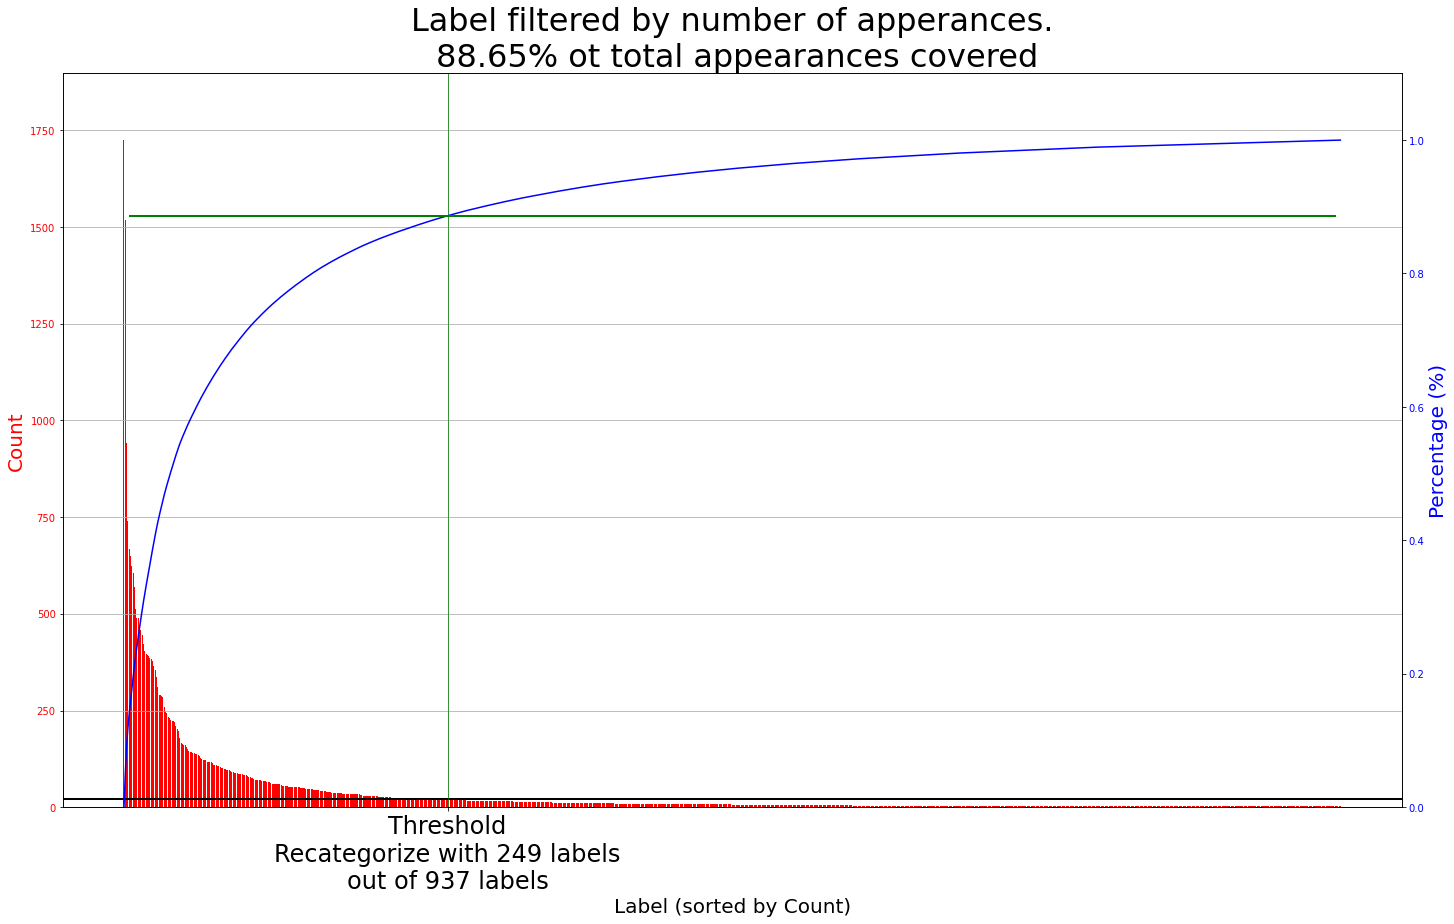

1 : None
2 : [('점검요청', 11), ('계기 점검요청', 6), ('통신 점검요청', 1), ('단자 점검요청', 1), ('점검요청 완료', 1), ('타이어 점검요청', 3), ('분실물 점검요청', 1), ('해당업체 점검요청', 23), ('통신 양호 점검요청', 1), ('라이트 정상 점검요청', 1), ('차고지 통신 점검요청', 1), ('LTE 계기 점검요청', 1), ('소음 해당업체 점검요청', 1), ('동일 해당업체 점검요청', 1), ('작동 해당업체 점검요청', 1), ('현장조치 불가 점검요청', 1), ('운전석 앞타이어 점검요청', 1), ('실행불가 해당업체 점검요청', 1), ('보조 도어 스위치 점검요청', 1), ('내비 실행 해당업체 점검요청', 6), ('매립 내비 해당업체 점검요청', 1), ('계속 반복 해당업체 점검요청', 1), ('배터리 방전 공기압 점검요청', 1), ('상태 진행 해당업체 점검요청', 1), ('TCS 내비 해당업체 점검요청', 1), ('엔진체크 경고등 점등 점검요청', 1), ('내비 실행불가 해당업체 점검요청', 3), ('전우 타이어 측면 파손 점검요청', 1), ('전우 하향등 커넥 고장 점검요청', 1), ('전좌 하향등 커넥 고장 점검요청', 1), ('TCS 내비 불가 해당업체 점검요청', 1), ('시스템 점검 경고 알림 유지 점검요청', 1), ('라디오 가능 안들어옴 해당업체 점검요청', 1), ('디스플레이 터치 불가 해당업체 점검요청', 1), ('블랙박스전원 안들어옴 해당업체 점검요청', 1), ('TCS 재시작 정상작동 해당업체 점검요청', 1), ('하이패스단말기 전원불량 해당업체 점검요청', 1), ('하이패스 단말 배선 단말 해당업체 점검요청', 1), ('정상작동 인입 추가 인입 해당업체 점검요청', 1), ('내비 케이블 접촉불량 화면 해당업체 점검요청', 1), ('매립네비 고정안 내부 안쪽 해당업체 점검요청', 1), ('TCS 재시작 정

In [ ]:
sub_labels = {}
temp = dict(group_duplicated_word_tk(set(freq_tk_ls)))
[print(key,':',value) for key,  value in temp.items()]
for k, v in temp.items():
    if v:
        sub_labels[v[0][0]] = [x[0] for x in v]

- 전처리 단계에서 '미쉐린', 'RH', 'RA' 제거
- exclude_tokens에 '사용', '기능', 'DL', '동일' 제거

In [ ]:
# sub_labels['후패드']

In [ ]:
print(sub_labels.keys())

dict_keys(['점검요청', '통신', '내비', '경고등', '후방영상', '촉매', '설정변경', '후방카메라', '손상', '오디오', '펑크수리', '하이패스카드', '공기압 보충 경고등 해제', '고장코드', '점검완료', '시운전 브레이크', '장착완료', 'SD 카드', '사이드미러', '컴파운드', '정상', '정상동작 확인', '기억소거', '브레이크 소음', '범퍼', '타이어교환', '소리', '타이어공기압 보충', '배선', 'CSA', '충전카드 교환', '내비게이션', '후방카메라 케이블', '휴즈 교환', 'AGM', '악취', '제어', '복귀', '교환 정상', '네비게이션 정상작동', '커넥터', '네비', '발송', '스로틀바디', '안개등', '전조등', '워셔액', '브레이크등 교환', '주행 소음', '출장점검 딜리버리', '지역', '얼라이먼트', '오일 교환', '긴급', '점프', '점검 자재', '공임', '바디 클리닝', 'ECU 업그레이드', '별도조치', '지하층', 'VOC 요청', '하이패스 유심', '주유', '하향등', '리셋', '배터리점프', '진단기 점검', '프론트', '어셈블리', '백색더블', '후좌 타이어', '점화플러그', '현장방문', '보정작업', '메모리카드', '분실물 회수', 'BNK', '점등', '미등', '부품 공임', '내비 장애처리 방문', '카워시', '얼라인먼트', '디스크교환', '엔진체크', '작동불가', '소켓교환', '펌프', '키아웃', '케이블 점검', '배선고정', '중앙', '수리', '와이퍼교환', '플러그 교환', '제동등 전구교환', '타이어 IQ', '점검 이상', '단말기 교환', '센서교환', '운전석 브레이크등', '주간주행등 교환', '펑크흔적', '조치완료', '확인 가능', '탈부착', '부착완료', '업체 방문 요청', '주간주행등', '미션', '단말', '전패드', '블루투스', 'BSD 보정작업', '대행비', '충전', 

In [ ]:
'얼라이먼트'in sub_labels.keys()

True

In [ ]:
# sub_labels['라이']

In [ ]:
# def get_category_v2(tokens):
#     category = []
#     if tokens == None:
#         return
#     for t in tokens:
#         sub_cat = []
#         for key, value in sub_labels.items():
#             if key not in ['작동하지', '현상', '수', '양쪽' ,'좌측', '우측','부분', '동작']: 
#                 if t in value:
#                     sub_cat.append(key)
#             if sub_cat:
#             category.append(sub_cat)
#     if not category:
#       return None
#     return category

In [ ]:
def get_category(tokens):
    category = []
    if tokens == None:
        return
    for t in tokens:
        
        sub_cat = []
        for key, value in sub_labels.items():
            if t in value:
                sub_cat.append(key)
        if sub_cat:
            sub_cat.sort(key=lambda x: t.index(x))
            category.append(sub_cat)
    if not category:
        return None
    return category

In [ ]:
'CM 배선수리'.index('수리')

5

In [ ]:
data['new_inspect_type'] = data['tokenized_labels'].apply(get_category)

In [ ]:
def rm_duplicate_v2(s):
    if s is None:
        return None
    final_res = []
    for sub_label in s:
        temp = sorted(sub_label, key=len)
        res = []
        while temp:
            cand = temp.pop()
            cnt = 0
            for el in res:
                if cand in el:
                    cnt = 1
                    break
            if not cnt:
                res.append(cand)
        if res:
            res.sort(key=lambda x: sub_label.index(x))
            final_res.append(res)
    if not final_res:
        return None
    return final_res

In [ ]:
# def rm_duplicate(s):
#     if s is None:
#         return None
#     temp = sorted(s, key=len)
#     res = []
#     while temp:
#         cand = temp.pop()
#         cnt = 0
#         for el in res:
#             if cand in el:
#                 cnt = 1
#                 break
#         if not cnt:
#             res.append(cand)
#     if not res:
#         return None
#     res = [x for x in s if x in res]
#     return res

In [ ]:
data['new_inspect_type_cleanse'] = data['new_inspect_type'].apply(rm_duplicate_v2)

In [ ]:
data[data['lesion_id']==668538].iloc[1,-1]

[['TCS', '재시작', '네비'], ['네비'], ['해당업체 방문', '업체 방문 요청']]

In [ ]:
PATH

'/content/drive/MyDrive/정비메모분석/data'

In [ ]:
print(f'Unique classes :', len(sub_labels) )

Unique classes : 248


In [ ]:
# data.to_json(PATH + '/desc_labeled.json')